In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random
# plt.style.use('./deeplearning.mplstyle')

In [37]:
# Using the same housing data

X_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [51]:
class GradientDescent():

    def __init__(self, X, y, lr=0.1):
        self.lr = lr
        self.X = X
        self.y = y
        self.m = X.shape[0]

    # Model representation
    def f(self, x, w, b):
        return w * x + b

    # Compute output prediction for each input sample, given some choice for w & b

    def compute_model_output(self, w, b):
        f_wb = np.zeros(self.m)

        for i in range(self.m):
            f_wb[i] = f(self.X[i], w, b)

        return f_wb


    def compute_cost(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        cost_sum = np.sum(cost**2)
        return (1 / (2 * self.m)) * cost_sum


    def cost_derivative_w(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_dw = np.sum(cost * self.X)
        dj_dw = dj_dw * (1 / self.m)
        return dj_dw


    def cost_derivative_b(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_db = np.sum(cost)
        dj_db = dj_db * (1 / self.m)
        return dj_db


    def update_weights(self, w, b):
        tmp_w = w - lr * self.cost_derivative_w(w, b)
        tmp_b = b - lr * self.cost_derivative_b(w, b)
        w = tmp_w
        b = tmp_b

        return w, b


    def run(self):
        w = random.randint(0, 500)
        b = random.randint(0, 500)

        cost = self.compute_cost(w, b)
        prev_cost = cost + 1

        while prev_cost > cost:
            prev_cost = cost
            print(f'Current cost = {prev_cost}')
            w, b = self.update_weights(w, b)
            cost = self.compute_cost(w, b)
            
        print(f'\nFinal cost = {prev_cost}')
        return w, b

In [52]:
gd = GradientDescent(X_train, y_train, lr=0.1)
w, b = gd.run()

print(f'Optimal Parameters: w = {w}, b = {b}')

Current cost = 55450.25
Current cost = 24282.343125000003
Current cost = 10811.930878125013
Current cost = 4987.552669628909
Current cost = 2466.608763269266
Current cost = 1372.9362006354918
Current cost = 895.9629671341509
Current cost = 685.4913376408448
Current cost = 590.222138079987
Current cost = 544.7876594069337
Current cost = 520.9457430334096
Current cost = 506.4938398344869
Current cost = 496.1591119580153
Current cost = 487.66262330445545
Current cost = 480.01892562349065
Current cost = 472.80141730803047
Current cost = 465.82495133164696
Current cost = 459.0087100848574
Current cost = 452.31696210989054
Current cost = 445.73346666770306
Current cost = 439.25041540217103
Current cost = 432.863654564636
Current cost = 426.57062067280026
Current cost = 420.3694484749605
Current cost = 414.2585853954321
Current cost = 408.23662480075717
Current cost = 402.30223380681093
Current cost = 396.4541219333257
Current cost = 390.69102740827896
Current cost = 385.01171109985944
Curren

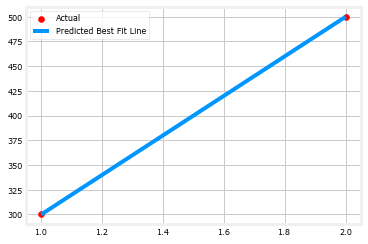

In [54]:
plt.scatter(X_train, y_train, c='r', label='Actual')
plt.plot(X_train, gd.compute_model_output(w, b), label='Predicted Best Fit Line')
plt.grid()
plt.legend()
plt.show()